In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

sys.path.append('/content/drive/My Drive')

Mounted at /content/drive


In [2]:
!pip install datasets
!pip install sacremoses
!pip install evaluate
!pip install rouge_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [3]:
# import modules
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import MarianTokenizer
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset

from model import NMTModel, Trainer
from dataloader import NMTDataset
from evaluate_models import calculate_scores

In [4]:
dataset = load_dataset('cfilt/iitb-english-hindi')

train_data = dataset['train']
train_data = train_data.select(range(1000000))
val_data = dataset['validation']

model_name = "Helsinki-NLP/opus-mt-en-hi"
tokenizer = MarianTokenizer.from_pretrained(model_name)

max_length = 75

train_dataset = NMTDataset(train_data, tokenizer, tokenizer, max_length)
val_dataset = NMTDataset(val_data, tokenizer, tokenizer, max_length)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.14k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/190M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/85.7k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/500k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1659083 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/520 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2507 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

In [5]:
# initialize fine-tuned model
model = NMTModel(model_name)

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
# load fine-tuned model weights
model.load_state_dict(torch.load('/content/drive/MyDrive/ft_marian_final_100k_epoch_0 (1).pt'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
Evaluating: 100%|██████████| 2507/2507 [31:04<00:00,  1.34it/s]


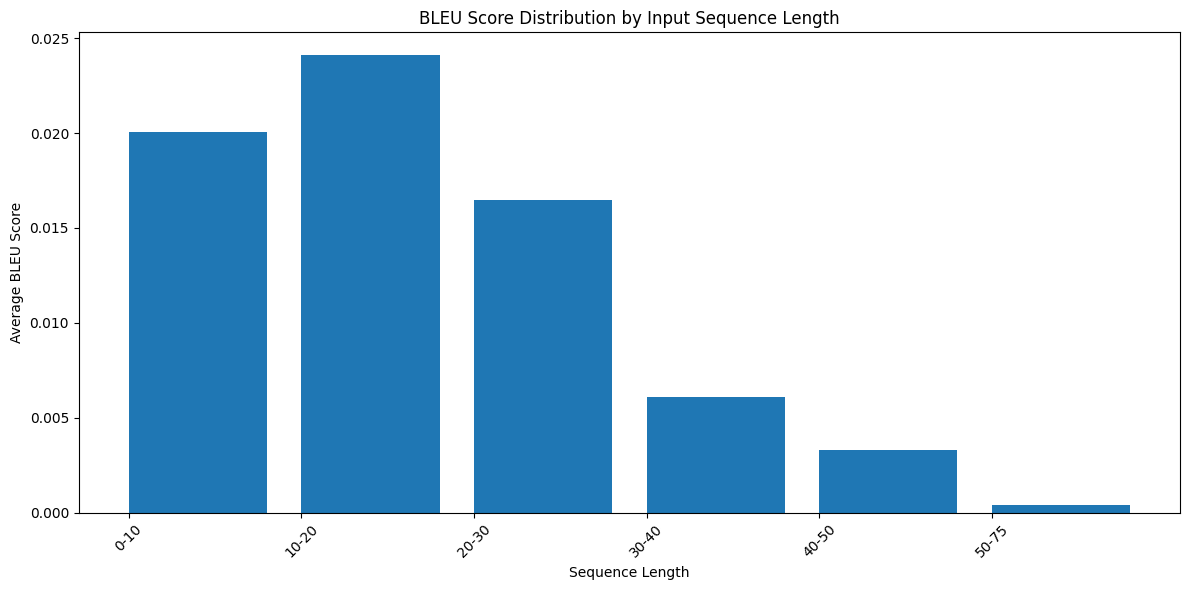

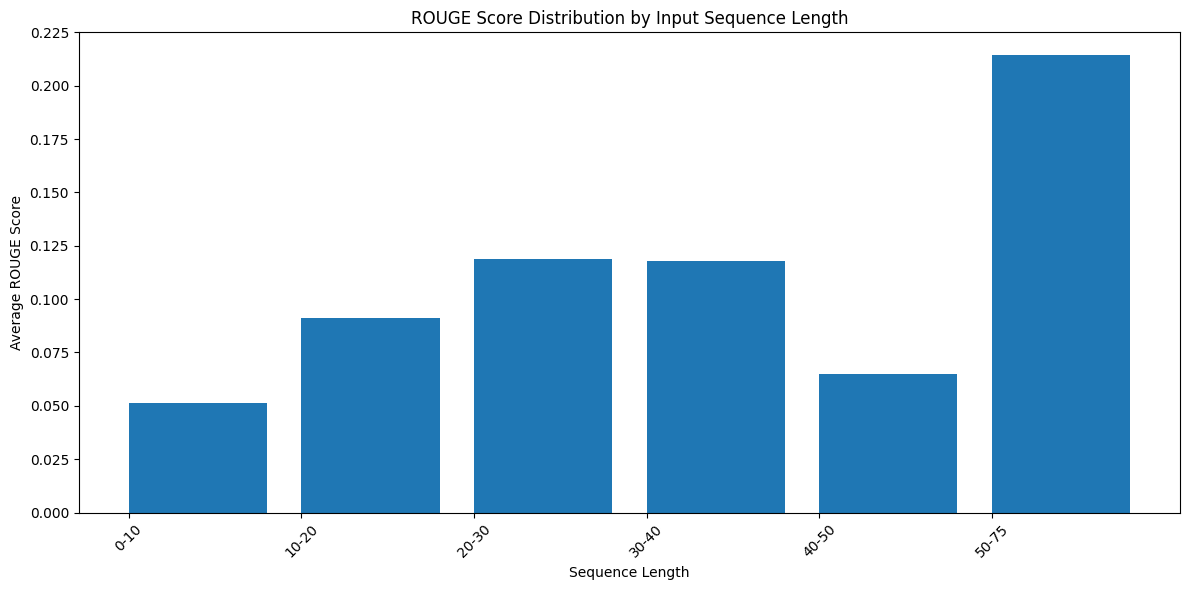

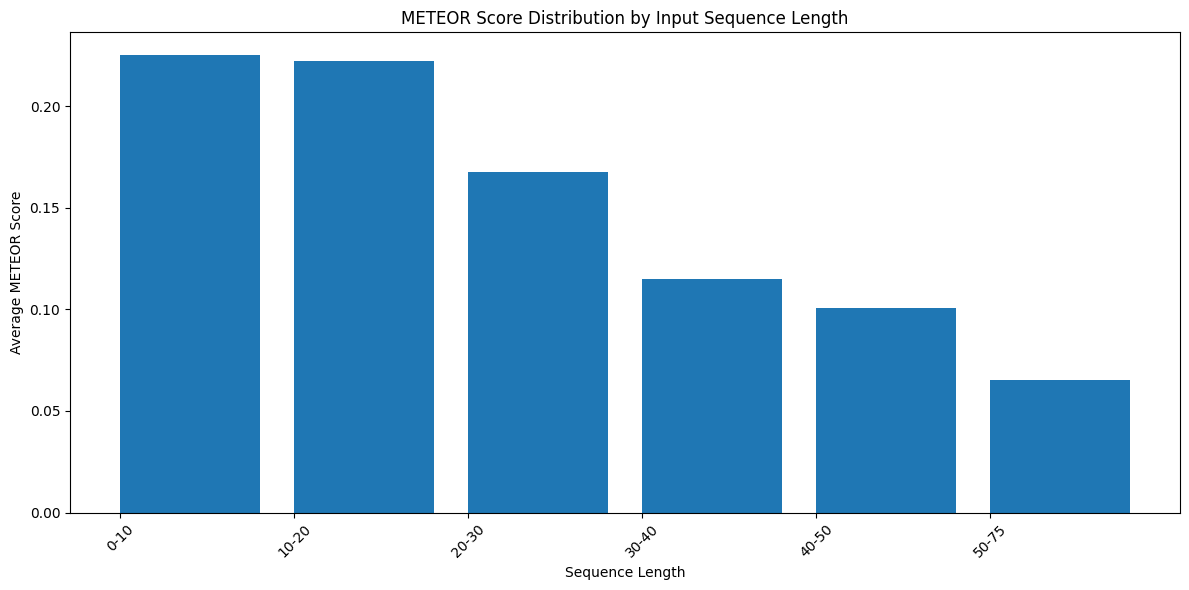

{'bleu': 0.03839970156182225,
 'rouge': np.float64(0.09711308753201975),
 'meteor': np.float64(0.18922941633724943),
 'score_by_length': {'bins': ['0-10',
   '10-20',
   '20-30',
   '30-40',
   '40-50',
   '50-60'],
  'avg_bleu': [np.float64(0.020054082820734336),
   np.float64(0.024105340741672397),
   np.float64(0.016481254280874227),
   np.float64(0.006070958071317895),
   np.float64(0.0032884164222614642),
   np.float64(0.00042036568968155917)],
  'avg_rouge': [np.float64(0.051097178683385584),
   np.float64(0.0911492773561739),
   np.float64(0.11871886830045825),
   np.float64(0.11790093964007008),
   np.float64(0.06472281895214226),
   np.float64(0.21428571428571427)],
  'avg_meteor': [np.float64(0.22513314016662594),
   np.float64(0.22219591591233917),
   np.float64(0.16783368992440367),
   np.float64(0.11513716205431831),
   np.float64(0.10075868299665336),
   np.float64(0.06547744092060585)],
  'counts': [np.int64(319),
   np.int64(1073),
   np.int64(717),
   np.int64(299),
  

In [7]:
# evaluate the model
calculate_scores(model, tokenizer, tokenizer, 75)

In [4]:
# wrapper class for trained mBART model
class MBartModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-one-to-many-mmt")
        self.tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-one-to-many-mmt", src_lang="en_XX")

    def predict(self, input_ids, attention_mask, max_length=75):

        outputs = self.model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=max_length,
            forced_bos_token_id=self.tokenizer.lang_code_to_id["hi_IN"]
        )

        return outputs

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/717 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.14k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/190M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/85.7k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/500k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1659083 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/520 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2507 [00:00<?, ? examples/s]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
Evaluating: 100%|██████████| 2507/2507 [36:30<00:00,  1.14it/s]


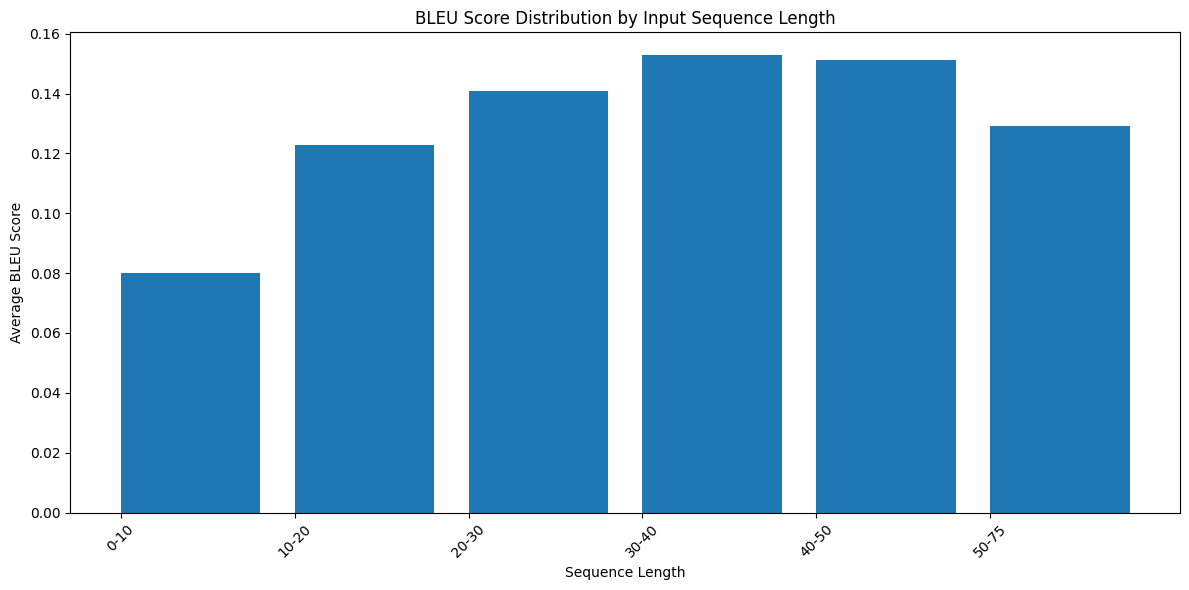

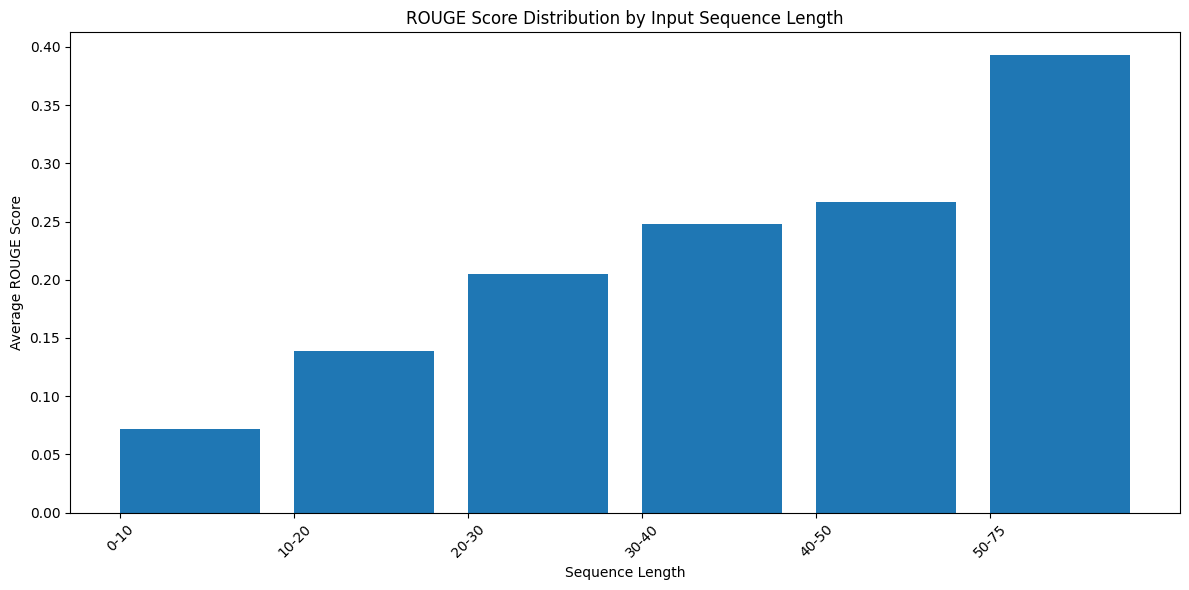

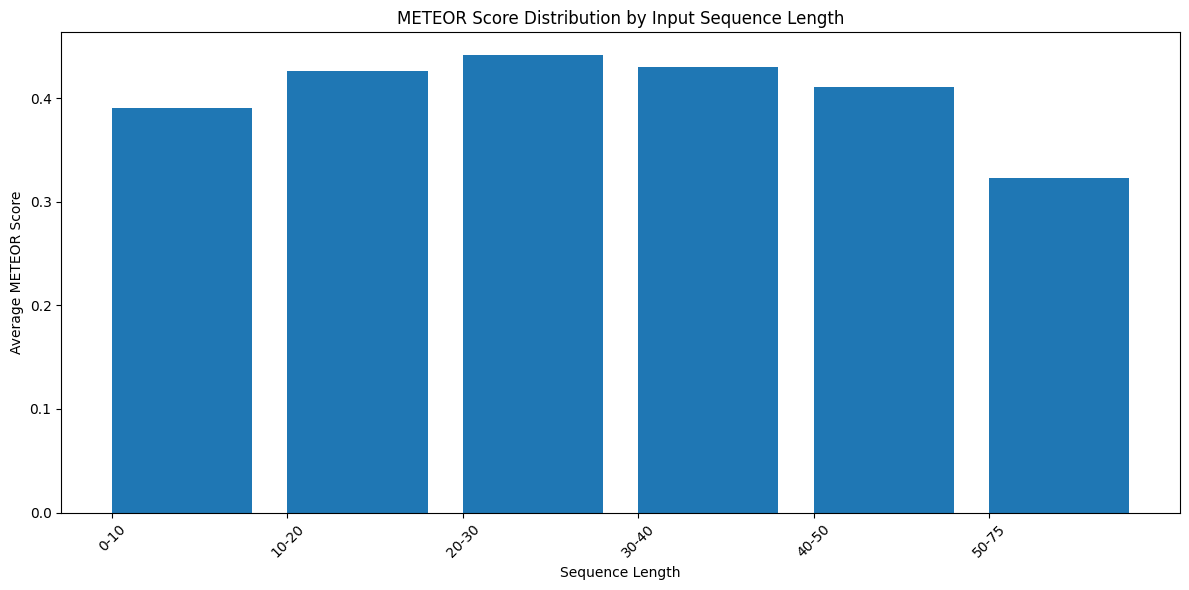

{'bleu': 0.1820975555764796,
 'rouge': np.float64(0.16774441340848956),
 'meteor': np.float64(0.42538417175521914),
 'score_by_length': {'bins': ['0-10',
   '10-20',
   '20-30',
   '30-40',
   '40-50',
   '50-60'],
  'avg_bleu': [np.float64(0.08018224553875228),
   np.float64(0.12284290353869717),
   np.float64(0.1408009039483842),
   np.float64(0.1528007461167792),
   np.float64(0.15122126128186547),
   np.float64(0.12927253118157572)],
  'avg_rouge': [np.float64(0.0715778474399164),
   np.float64(0.1383733487181763),
   np.float64(0.20528235130745592),
   np.float64(0.24790061295078017),
   np.float64(0.26694127471777246),
   np.float64(0.39285714285714285)],
  'avg_meteor': [np.float64(0.39063398323146814),
   np.float64(0.4264468931822609),
   np.float64(0.4413194483722974),
   np.float64(0.4297521917752551),
   np.float64(0.41077252576923856),
   np.float64(0.322981432503035)],
  'counts': [np.int64(319),
   np.int64(1073),
   np.int64(717),
   np.int64(299),
   np.int64(84),
   n

In [5]:
# evaluate the mBART model
model = MBartModel()
tokenizer = model.tokenizer
calculate_scores(model, tokenizer, tokenizer, max_length=75)